# Proyek Analisis Data - Coordinator Trainee Service Quality



*   Nama : Amrul Fadhil Yofan
*   Email : amrul.yofan@gmail.com



## Menganalisis Data Terkait Service Quality dan Menentukan Pertanyaan Bisnis

Berikut beberapa analisis yang dapat dilakukan:


*   Persebaran toko pada setiap wilayah dan distribusi faktor masalah pada setiap divisi
*   Analisis waktu penyelesaian masalah serta identifikasi faktor penyebab masalah
*   Analisis tingkat kepuasan dan pengaruh faktor masalah terhadap tingkat kepuasan pelanggan
*   Hubungan antara waktu penyelesaian masalah dengan tingkat kepuasan pelanggan
*   Perbandingan rata-rata tingkat kepuasan berdasarkan wilayah dan divisi

Diperoleh kemungkinan beberapa pertanyaan sebagai berikut:


*   Wilayah/cabang manakah yang memiliki toko paling banyak atau paling sedikit?
*   Apa penyebab masalah yang paling banyak dihadapi oleh masing-masing divisi?
*   Bagaimana distribusi penyebab masalah pada setiap divisi?
*   Divisi manakah yang menangani kasus masalah paling banyak?
*   Bagaimana distribusi data waktu penyelesaian masalah untuk semua kategori? Apakah relatif cepat atau lambat?
*   Apa penyebab masalah yang memiliki frekuensi paling banyak atau paling sedikit?
*   Bagaimana persentase atau perbandingan tingkat kepuasan pelanggan?
*   Bagaimana distribusi faktor masalah terhadap tingkat kepuasan pelanggan?
*   Bagaimana korelasi/hubungan antara waktu penyelesaian masalah dengan tingkat kepuasan pelanggan?
*   Wilayah/cabang manakah yang memiliki rata-rata tingkat kepuasan tertinggi/terendah?
*   Divisi manakah yang memiliki rata-rata tingkat kepuasan tertinggi/terendah?









### Library

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm

## Data Wrangling

### Gathering Data

Dilakukan proses pengumpulan data dan menyiapkan dataset supaya memudahkan proses analisis data.

In [101]:
data = pd.read_excel("dataset.xlsx")
data.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NAMA_CABANG,DIVISI,BULAN_TGL_PROB,TGL_PROB,TGL_PROGRESS,TGL_SOLVE,TGL_CLOSE,KODE_TOKO,NAMA_TOKO,CODE_UNIT,MASALAH,STATUS,WAKTU_PENYELESAIAN,TARGET_HARI,ACH_SLA,FAKTOR_PROBLEM,TINGKAT_KEPUASAN
2,PEKANBARU,IT Opr Cabang,Jan,2017-01-01 04:21:15,2017-01-01 04:44:38,2017-01-01 11:57:04,2017-01-02 14:39:21,1A10,DURIAN,PLX-001,LX 300,Closed,1,1,100,HARDWARE,4
3,PEKANBARU,IT Opr Cabang,Jan,2017-01-01 07:33:03,2017-01-11 08:51:13,2017-01-21 16:07:02,2017-01-21 21:20:36,1A76,CIPTA KARYA 2,CTV-001,CCTV,Closed,10,1,-200,HARDWARE,4
4,PEKANBARU,IT Opr Cabang,Jan,2017-01-01 16:56:37,2017-01-01 16:57:47,2017-01-02 14:34:56,2017-01-02 14:36:38,1A67,RIAU 2,PLX-001,LX 300,Closed,0,1,200,HARDWARE,3
5,PEKANBARU,IT Opr Cabang,Jan,2017-01-02 02:02:21,2017-01-02 02:06:38,2017-01-16 13:59:09,2017-01-16 14:08:07,1A63,SETIA BUDI,CTV-001,CCTV,Closed,14,1,-200,HARDWARE,3
6,PEKANBARU,IT Bussines Solution,Jan,2017-01-02 08:27:02,2017-01-02 08:35:00,2017-01-02 08:57:41,2017-01-02 09:11:05,1AL8,MH THAMRIN DUMAI,SIS-035,UTILITY EOD,Closed,0,1,200,SOFTWARE INTERNAL,4
7,PEKANBARU,IT Opr Cabang,Jan,2017-01-02 13:54:00,2017-01-02 13:54:04,2017-01-09 09:21:58,2017-01-09 09:23:51,1AK2,KESUMA - DUMAI,PLX-001,LX 300,Closed,6,1,-200,HARDWARE,4
8,PEKANBARU,IT Bussines Solution,Jan,2017-01-02 23:13:58,2017-01-02 23:15:06,2017-01-02 23:37:20,2017-01-03 11:17:33,1A85,HR.SOEBRANTAS 6,RPT-008,PROSES BUKA REPORT,Closed,0,1,200,SOFTWARE INTERNAL,4
9,PEKANBARU,IT Opr Cabang,Jan,2017-01-03 05:44:04,2017-01-03 05:45:36,2017-01-03 10:19:28,2017-01-03 10:24:49,1AL6,SUKA RAMAI PEKANBARU,CTV-001,CCTV,Closed,0,1,200,SETING IT,4


In [102]:
df = data.drop(data.index[0])
df.columns = df.iloc[0].values
df = df[1:].reset_index(drop=True)
df

,NAMA_CABANG,DIVISI,BULAN_TGL_PROB,TGL_PROB,TGL_PROGRESS,TGL_SOLVE,TGL_CLOSE,KODE_TOKO,NAMA_TOKO,CODE_UNIT,MASALAH,STATUS,WAKTU_PENYELESAIAN,TARGET_HARI,ACH_SLA,FAKTOR_PROBLEM,TINGKAT_KEPUASAN
0,PEKANBARU,IT Opr Cabang,Jan,2017-01-01 04:21:15,2017-01-01 04:44:38,2017-01-01 11:57:04,2017-01-02 14:39:21,1A10,DURIAN,PLX-001,LX 300,Closed,1,1,100,HARDWARE,4
1,PEKANBARU,IT Opr Cabang,Jan,2017-01-01 07:33:03,2017-01-11 08:51:13,2017-01-21 16:07:02,2017-01-21 21:20:36,1A76,CIPTA KARYA 2,CTV-001,CCTV,Closed,10,1,-200,HARDWARE,4
2,PEKANBARU,IT Opr Cabang,Jan,2017-01-01 16:56:37,2017-01-01 16:57:47,2017-01-02 14:34:56,2017-01-02 14:36:38,1A67,RIAU 2,PLX-001,LX 300,Closed,0,1,200,HARDWARE,3
3,PEKANBARU,IT Opr Cabang,Jan,2017-01-02 02:02:21,2017-01-02 02:06:38,2017-01-16 13:59:09,2017-01-16 14:08:07,1A63,SETIA BUDI,CTV-001,CCTV,Closed,14,1,-200,HARDWARE,3
4,PEKANBARU,IT Bussines Solution,Jan,2017-01-02 08:27:02,2017-01-02 08:35:00,2017-01-02 08:57:41,2017-01-02 09:11:05,1AL8,MH THAMRIN DUMAI,SIS-035,UTILITY EOD,Closed,0,1,200,SOFTWARE INTERNAL,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53786,REMBANG,MAINTENANCE,Jan,2017-01-25 12:37:19,2017-02-09 09:37:57,2017-02-09 09:38:56,2017-02-15 16:52:50,U398,BANGILAN,INS-001,INSTALASI LISTRIK + ASESORIS,Closed,21,14,50,LIFETIME,4
53787,JAMBI,MAINTENANCE,Jan,2017-01-02 14:30:41,2017-01-02 14:55:41,2017-01-31 09:57:25,2017-02-07 10:19:42,1DF4,SIMPANG PELAWAN,MEJ-003,PINTU + KUSEN + ASESORIS,Closed,35,3,-200,LIFETIME,3
53788,MAKASSAR,MAINTENANCE,Jan,2017-01-11 20:18:19,2017-01-12 07:32:14,2017-01-12 09:20:05,2017-01-12 09:27:06,R379,TUPAI,INS-004,GENSET + ASESORIS,Closed,0,14,200,LIFETIME,4
53789,CILEUNGSI 2,MAINTENANCE,Jan,2017-01-21 15:51:27,2017-03-23 09:07:56,2017-04-11 10:12:17,2017-04-11 15:15:03,J332,APART WISMA GADING,MEJ-004,PINTU ALUMUNIUM/KACA/FLOORHINGE,Closed,67,4,-200,LIFETIME,2


### Assessing Data

Dilakukan proses assessing data untuk melihat apakah ada kesalahan-kesalahan data yang perlu diperbaiki. Terlebih dahulu ditinjau informasi-informasi yang ada pada data tersebut.

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53791 entries, 0 to 53790
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   NAMA_CABANG         53791 non-null  object
 1   DIVISI              53791 non-null  object
 2   BULAN_TGL_PROB      53791 non-null  object
 3   TGL_PROB            53791 non-null  object
 4   TGL_PROGRESS        53788 non-null  object
 5   TGL_SOLVE           53791 non-null  object
 6   TGL_CLOSE           53791 non-null  object
 7   KODE_TOKO           53791 non-null  object
 8   NAMA_TOKO           53791 non-null  object
 9   CODE_UNIT           53791 non-null  object
 10  MASALAH             53791 non-null  object
 11  STATUS              53791 non-null  object
 12  WAKTU_PENYELESAIAN  53791 non-null  object
 13  TARGET_HARI         53791 non-null  object
 14  ACH_SLA             53791 non-null  object
 15  FAKTOR_PROBLEM      53791 non-null  object
 16  TINGKAT_KEPUASAN    53

In [104]:
df.isna().sum()

,0
NAMA_CABANG,0
DIVISI,0
BULAN_TGL_PROB,0
TGL_PROB,0
TGL_PROGRESS,3
TGL_SOLVE,0
TGL_CLOSE,0
KODE_TOKO,0
NAMA_TOKO,0
CODE_UNIT,0


In [105]:
df.describe()

,NAMA_CABANG,DIVISI,BULAN_TGL_PROB,TGL_PROB,TGL_PROGRESS,TGL_SOLVE,TGL_CLOSE,KODE_TOKO,NAMA_TOKO,CODE_UNIT,MASALAH,STATUS,WAKTU_PENYELESAIAN,TARGET_HARI,ACH_SLA,FAKTOR_PROBLEM,TINGKAT_KEPUASAN
count,53791,53791,53791,53791,53788,53791,53791,53791,53791,53791,53791,53791,53791,53791,53791,53791,53791
unique,32,17,1,52978,52628,52891,53142,10997,10530,449,438,1,279,15,264,25,4
top,CILEUNGSI 2,MAINTENANCE,Jan,2017-01-05 15:47:18,2017-01-17 08:48:48,2017-01-12 13:59:37,2017-01-16 14:43:48,X208,RAYA CEMPLANG,INS-005,LAMPU + ASESORIS,Closed,0,1,200,LIFETIME,4
freq,4747,18311,53791,3,3,90,3,63,63,2712,2712,53791,23388,21515,23388,18020,28760


In [106]:
print("Jumlah duplikasi tabel: ", df.duplicated().sum())

Jumlah duplikasi tabel:  0


Diperoleh hasil identifikasi masalah pada data, yakni sebagai berikut.

In [107]:
df_table_assess = pd.DataFrame({
    "Data Type": ['Terdapat kesalahan tipe data untuk kolom TGL_PROB, TGL_PROGRESS, TGL_SOLVE, dan TGL_CLOSE (seharusnya bertipe data datetime) serta tipe data untuk kolom WAKTU_PENYELESAIAN, TARGET_HARI, ACH_SLA dan TINGKAT_KEPUASAN (seharusnya bertipe data integer)'],
    "Missing Value": ['Terdapat entri data kosong pada kolom TGL_PROGRESS'],
    "Duplicate Data": ['-'],
    "Inaccurate Value": ['-']
})
df_table_assess.style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  .relabel_index(["df"], axis=0)

,DATA TYPE,MISSING VALUE,DUPLICATE DATA,INACCURATE VALUE
df,"Terdapat kesalahan tipe data untuk kolom TGL_PROB, TGL_PROGRESS, TGL_SOLVE, dan TGL_CLOSE (seharusnya bertipe data datetime) serta tipe data untuk kolom WAKTU_PENYELESAIAN, TARGET_HARI, ACH_SLA dan TINGKAT_KEPUASAN (seharusnya bertipe data integer)",Terdapat entri data kosong pada kolom TGL_PROGRESS,-,-


### Cleaning Data

Diperoleh dua permasalahan, yaitu terkait kesalahan tipe data dan eksistensi missing value.

In [108]:
df["TGL_PROB"] = pd.to_datetime(df["TGL_PROB"])
df["TGL_PROGRESS"] = pd.to_datetime(df["TGL_PROGRESS"])
df["TGL_SOLVE"] = pd.to_datetime(df["TGL_SOLVE"])
df["TGL_CLOSE"] = pd.to_datetime(df["TGL_CLOSE"])

In [109]:
df["WAKTU_PENYELESAIAN"] = df["WAKTU_PENYELESAIAN"].astype(int)
df["TARGET_HARI"] = df["TARGET_HARI"].astype(int)
df["ACH_SLA"] = df["ACH_SLA"].astype(int)
df["TINGKAT_KEPUASAN"] = df["TINGKAT_KEPUASAN"].astype(int)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53791 entries, 0 to 53790
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   NAMA_CABANG         53791 non-null  object        
 1   DIVISI              53791 non-null  object        
 2   BULAN_TGL_PROB      53791 non-null  object        
 3   TGL_PROB            53791 non-null  datetime64[ns]
 4   TGL_PROGRESS        53788 non-null  datetime64[ns]
 5   TGL_SOLVE           53791 non-null  datetime64[ns]
 6   TGL_CLOSE           53791 non-null  datetime64[ns]
 7   KODE_TOKO           53791 non-null  object        
 8   NAMA_TOKO           53791 non-null  object        
 9   CODE_UNIT           53791 non-null  object        
 10  MASALAH             53791 non-null  object        
 11  STATUS              53791 non-null  object        
 12  WAKTU_PENYELESAIAN  53791 non-null  int64         
 13  TARGET_HARI         53791 non-null  int64     

In [111]:
missing_values = df[df.isna().any(axis=1)]
missing_values

,NAMA_CABANG,DIVISI,BULAN_TGL_PROB,TGL_PROB,TGL_PROGRESS,TGL_SOLVE,TGL_CLOSE,KODE_TOKO,NAMA_TOKO,CODE_UNIT,MASALAH,STATUS,WAKTU_PENYELESAIAN,TARGET_HARI,ACH_SLA,FAKTOR_PROBLEM,TINGKAT_KEPUASAN
11363,MAKASSAR,IT Opr Cabang,Jan,2017-01-07 17:43:11,NaT,2017-07-24 10:02:34,2017-07-24 15:55:06,R179,SPBU SOREANG,LPP-001,LABEL PRICE PDA,Closed,0,1,200,SETING IT,3
19137,JEMBER,E SERVICE,Jan,2017-01-12 19:10:52,NaT,2017-05-08 13:37:20,2017-05-13 09:00:16,Y090,KARANG BONG,REB-001,REGISTRASI BRIS,Closed,4,3,67,DATABASE,3
19138,JEMBER,E SERVICE,Jan,2017-01-20 21:07:58,NaT,2017-05-10 15:49:16,2017-05-12 16:33:18,Y102,RAYA LUMAJANG,INF-001,INFORMASI,Closed,4,1,-200,VENDOR,4


Karena terdapat 1 feature yang memuat data kosong dan hanya ada 3 entri kosong, maka hal ini cukup dibiarkan saja.

## Exploratory Data Analysis (EDA)

### Deskripsi Data

Ditinjau beberapa deskripsi data secara statistik sebagai berikut.

In [112]:
df.describe(include="all")

,NAMA_CABANG,DIVISI,BULAN_TGL_PROB,TGL_PROB,TGL_PROGRESS,TGL_SOLVE,TGL_CLOSE,KODE_TOKO,NAMA_TOKO,CODE_UNIT,MASALAH,STATUS,WAKTU_PENYELESAIAN,TARGET_HARI,ACH_SLA,FAKTOR_PROBLEM,TINGKAT_KEPUASAN
count,53791,53791,53791,53791,53788,53791,53791,53791,53791,53791,53791,53791,53791.000000,53791.000000,53791.000000,53791,53791.000000
unique,32,17,1,NaN,NaN,NaN,NaN,10997,10530,449,438,1,NaN,NaN,NaN,25,NaN
top,CILEUNGSI 2,MAINTENANCE,Jan,NaN,NaN,NaN,NaN,X208,RAYA CEMPLANG,INS-005,LAMPU + ASESORIS,Closed,NaN,NaN,NaN,LIFETIME,NaN
freq,4747,18311,53791,NaN,NaN,NaN,NaN,63,63,2712,2712,53791,NaN,NaN,NaN,18020,NaN
mean,NaN,NaN,NaN,2017-01-16 20:12:08.535684352,2017-01-19 10:13:56.212147456,2017-01-27 08:44:23.519826688,2017-01-31 10:14:36.621330688,NaN,NaN,NaN,NaN,NaN,12.625532,6.258073,88.770482,NaN,3.201707
min,NaN,NaN,NaN,2017-01-01 00:01:45,2017-01-01 00:11:42,2017-01-01 00:13:12,2017-01-01 00:20:38,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,-200.000000,NaN,1.000000
25%,NaN,NaN,NaN,2017-01-09 17:10:32,2017-01-10 13:26:52.500000,2017-01-12 08:02:56.500000,2017-01-13 13:15:58.500000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,3.000000
50%,NaN,NaN,NaN,2017-01-16 18:37:15,2017-01-17 16:07:20.500000,2017-01-20 10:03:16,2017-01-23 15:03:00,NaN,NaN,NaN,NaN,NaN,1.000000,3.000000,171.000000,NaN,4.000000
75%,NaN,NaN,NaN,2017-01-24 06:56:30,2017-01-25 10:49:47.750000128,2017-01-30 10:16:14.500000,2017-02-01 13:54:33.500000,NaN,NaN,NaN,NaN,NaN,10.000000,14.000000,200.000000,NaN,4.000000
max,NaN,NaN,NaN,2017-01-31 23:59:32,2017-12-13 14:49:24,2017-12-18 10:27:55,2017-12-19 17:00:19,NaN,NaN,NaN,NaN,NaN,323.000000,90.000000,200.000000,NaN,4.000000


### Menghitung Jumlah Data Pada Beberapa Kolom

Ditinjau jumlah data pada beberapa kolom.

In [113]:
df["TINGKAT_KEPUASAN"].value_counts()

,count
TINGKAT_KEPUASAN,
4,28760
3,12522
2,7108
1,5401


In [114]:
df["NAMA_CABANG"].value_counts()

,count
NAMA_CABANG,
CILEUNGSI 2,4747
BALARAJA,4262
BOGOR,3059
KLATEN,2495
MALANG,2222
BEKASI,2132
CIANJUR,2057
SIDOARJO,2043
CIKOKOL,2041


In [115]:
df["DIVISI"].value_counts()

,count
DIVISI,
MAINTENANCE,18311
IT Opr Cabang,7602
IT Bussines Solution,6844
E SERVICE,4964
GENERAL SERVICE,3986
IT Opr HO,3274
HUMAN CAPITAL OPERATION,2357
IC,2172
MD Category,1249


In [116]:
df["WAKTU_PENYELESAIAN"].value_counts()

,count
WAKTU_PENYELESAIAN,
0,23388
1,4954
2,2912
3,1996
4,1613
...,...
215,1
246,1
181,1


In [117]:
df["MASALAH"].value_counts().head(10)

,count
MASALAH,
LAMPU + ASESORIS,2712
BRG ADA PO TDK ADA,2642
INSTALASI LISTRIK + ASESORIS,2455
REGISTRASI BRIS,2400
THUNDERBIRD,2187
KEBOCORAN ATAP,1686
CCTV,1455
TIDAK MEMILIKI PIN E TRANS,1407
PINTU ALUMUNIUM/KACA/FLOORHINGE,1303


In [118]:
df["TARGET_HARI"].value_counts()

,count
TARGET_HARI,
1,21515
14,9000
3,7776
7,5517
16,3972
15,1871
4,1749
19,881
5,538


In [119]:
df["FAKTOR_PROBLEM"].value_counts()

,count
FAKTOR_PROBLEM,
LIFETIME,18020
SOFTWARE INTERNAL,4874
HUMAN ERROR,4717
HARDWARE,4232
SETING IT,2663
DATABASE,2579
MISS COMMUNICATION,2357
DAMAGE,2122
SOFTWARE EXTERNAL,2030


### Binning Waktu Penyelesaian Masalah

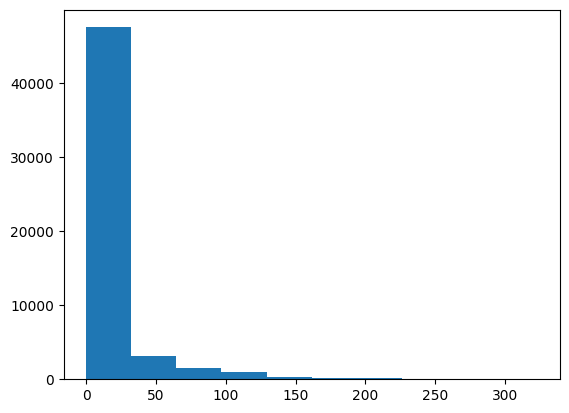

In [120]:
plt.hist(df['WAKTU_PENYELESAIAN'])
plt.show()

In [121]:
batas_bin_wp = [-1,5,20,500]
kategori_wp = ['0-5','6-20','21-500']
df1 = (pd.cut(df['WAKTU_PENYELESAIAN'], bins=batas_bin_wp, labels=kategori_wp)).copy()
df1

,WAKTU_PENYELESAIAN
0,0-5
1,6-20
2,0-5
3,6-20
4,0-5
...,...
53786,21-500
53787,21-500
53788,0-5
53789,21-500


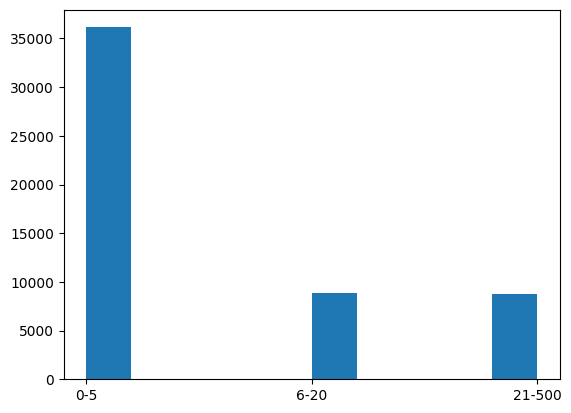

In [122]:
plt.hist(df1)
plt.show()

## Visualization and Explanatory Analysis

### Persebaran toko pada setiap wilayah



*   Wilayah/cabang manakah yang memiliki toko paling banyak atau paling sedikit?



Dibentuk diagram batang untuk melihat persebaran toko pada setiap wilayah/cabang sebagai berikut.

<ipython-input-123-b704abe1b35e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='NAMA_CABANG', data=df, palette='viridis', order=order, legend=False)


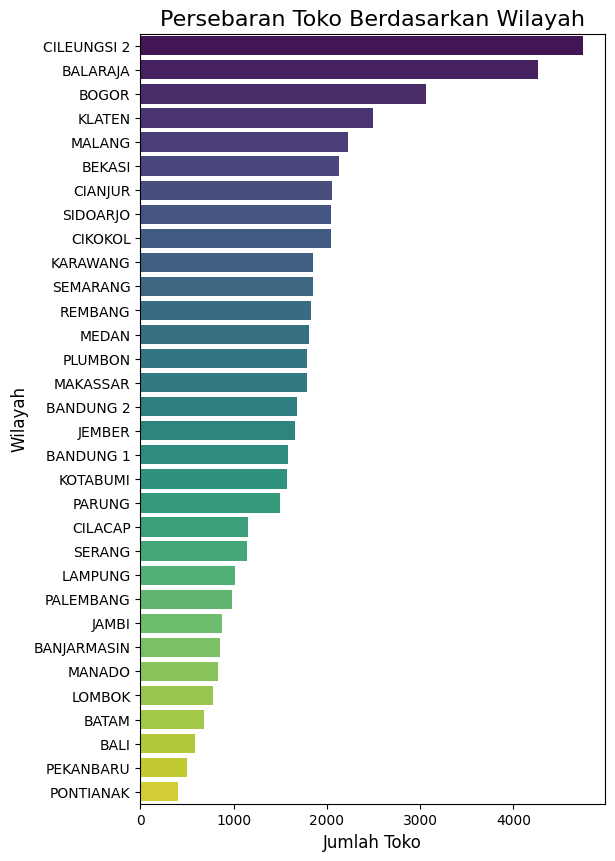

In [123]:
plt.figure(figsize=(6, 10))

order = df['NAMA_CABANG'].value_counts().index
sns.countplot(y='NAMA_CABANG', data=df, palette='viridis', order=order, legend=False)

plt.title('Persebaran Toko Berdasarkan Wilayah', fontsize=16)
plt.xlabel('Jumlah Toko', fontsize=12)
plt.ylabel('Wilayah', fontsize=12)

plt.show()

Berdasarkan diagram di atas, dapat dilihat bahwa persebaran toko di berbagai wilayah cukup beragam. Wilayah/cabang yang memiliki toko paling banyak adalah CILEUNGSI 2, sedangkan wilayah/cabang yang memiliki toko paling sedikit adalah PONTIANAK.

### Distribusi penyebab masalah pada setiap divisi



*   Apa penyebab masalah yang paling banyak dihadapi oleh masing-masing divisi?
*   Bagaimana distribusi penyebab masalah pada setiap divisi?
*   Divisi manakah yang menangani kasus masalah paling banyak?







Dibentuk beberapa tabel untuk melihat persebaran penyebab masalah pada masing-masing divisi.

In [124]:
df_div_main = df[df['DIVISI'] == "MAINTENANCE"]
df_div_IT_opr_cab = df[df['DIVISI'] == "IT Opr Cabang"]
df_div_IT_bus_sol = df[df['DIVISI'] == "IT Bussines Solution"]
df_div_esvc = df[df['DIVISI'] == "E SERVICE"]
df_div_gen_svc = df[df['DIVISI'] == "GENERAL SERVICE"]
df_div_IT_opr_HO = df[df['DIVISI'] == "IT Opr HO"]
df_div_HCO = df[df['DIVISI'] == "HUMAN CAPITAL OPERATION"]
df_div_IC = df[df['DIVISI'] == "IC"]
df_div_MDC = df[df['DIVISI'] == "MD Category"]
df_div_IT_bus_int = df[df['DIVISI'] == "IT Bussines Intelegent"]
df_div_MP = df[df['DIVISI'] == "Marketing Promosi"]
df_div_log = df[df['DIVISI'] == "LOGISTIC"]
df_div_frc = df[df['DIVISI'] == "FRANCHISE"]
df_div_MDF = df[df['DIVISI'] == "MD Food"]
df_div_FR = df[df['DIVISI'] == "FINANCE REGULER"]
df_div_FF = df[df['DIVISI'] == "FINANCE FRANCHISE"]
df_div_MDFP = df[df['DIVISI'] == "MD Food Project"]

Dalam hal ini, diperlihatkan jumlah faktor masalah dari beberapa divisi saja.  

In [125]:
df_div_main['FAKTOR_PROBLEM'].value_counts()

,count
FAKTOR_PROBLEM,
LIFETIME,16616
HUMAN ERROR,1681
SERVER HO,14


In [126]:
df_div_IC['FAKTOR_PROBLEM'].value_counts()

,count
FAKTOR_PROBLEM,
SYSTEM,1099
HUMAN ERROR,1073


In [127]:
df_div_IT_opr_cab['FAKTOR_PROBLEM'].value_counts()

,count
FAKTOR_PROBLEM,
HARDWARE,4221
SETING IT,2663
KABEL LAN,516
DATA MASTER,202


Diperhatikan untuk divisi MAINTENANCE, ada 3 penyebab masalah yang ditangani, dengan penyebab masalah tertinggi berupa LIFETIME. Untuk divisi IC dan IT Opr Cabang, penyebab masalah tertinggi secara berturut-turut adalah SYSTEM dan HARDWARE. Selanjutnya, ditampilkan diagram batang untuk melihat persebaran setiap divisi terhadap jumlah dan penyebab masalah.

In [128]:
problem_distribution = df.groupby(['DIVISI', 'FAKTOR_PROBLEM']).size().unstack().fillna(0)
problem_distribution

FAKTOR_PROBLEM,DAMAGE,DATA BASE,DATA MASTER,DATABASE,FAST MOVING ITEM,GARANSI,HARDWARE,HUMAN ERROR,ITEMS LESS,KABEL LAN,...,SERVER ETRANS,SERVER HO,SETING IT,SHIPPING LATE,SOFTWARE,SOFTWARE EXTERNAL,SOFTWARE INTERNAL,SYSTEM,VENDOR,VENDOR ERROR
DIVISI,,,,,,,,,,,,,,,,,,,,,
E SERVICE,0.0,0.0,0.0,2579.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,331.0,0.0,0.0,0.0,1671.0,0.0
FINANCE FRANCHISE,0.0,0.0,0.0,0.0,0.0,0.0,4.0,16.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FINANCE REGULER,0.0,0.0,0.0,0.0,0.0,0.0,7.0,44.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FRANCHISE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GENERAL SERVICE,2122.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,497.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HUMAN CAPITAL OPERATION,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1073.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1099.0,0.0,0.0
IT Bussines Intelegent,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1192.0,0.0,0.0,0.0
IT Bussines Solution,0.0,520.0,0.0,0.0,936.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1706.0,0.0,0.0,3682.0,0.0,0.0,0.0


In [129]:
problem_distribution["LIFETIME"]

,LIFETIME
DIVISI,
E SERVICE,0.0
FINANCE FRANCHISE,14.0
FINANCE REGULER,23.0
FRANCHISE,0.0
GENERAL SERVICE,1367.0
HUMAN CAPITAL OPERATION,0.0
IC,0.0
IT Bussines Intelegent,0.0
IT Bussines Solution,0.0


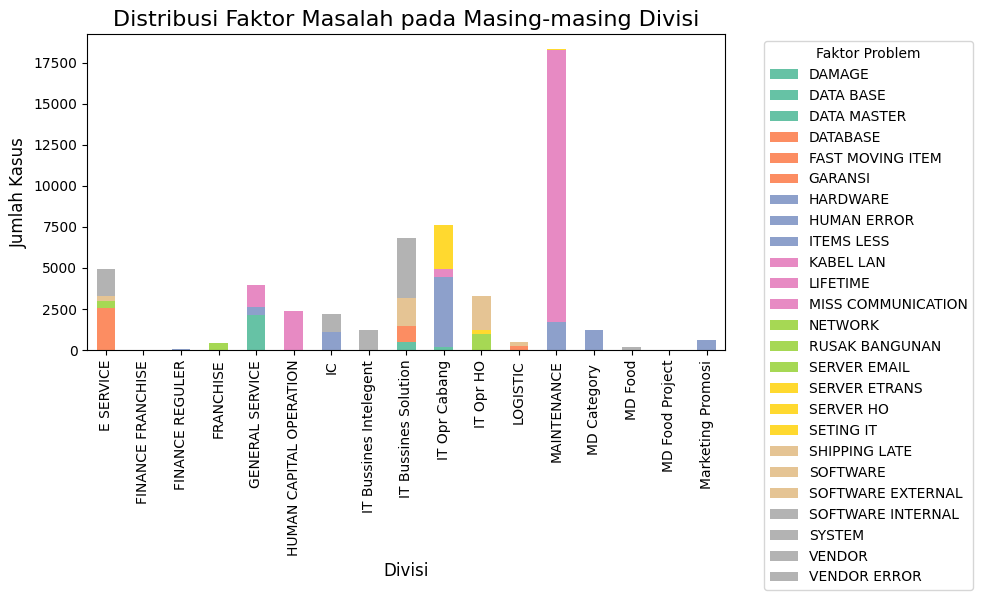

In [130]:
problem_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='Set2')

plt.title('Distribusi Faktor Masalah pada Masing-masing Divisi', fontsize=16)
plt.xlabel('Divisi', fontsize=12)
plt.ylabel('Jumlah Kasus', fontsize=12)

plt.legend(title='Faktor Problem', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Melalui diagram di atas, persebaran masalah pada setiap divisi beragam, terdapat divisi yang paling banyak menangani kasus, serta terdapat pula divisi yang tidak menangani kasus sama sekali. Dapat dilihat bahwa kasus masalah paling banyak ditangani oleh divisi MAINTENANCE, dengan faktor masalah tertinggi berupa LIFETIME.

### Analisis waktu penyelesaian masalah serta identifikasi faktor penyebab masalah



*   Bagaimana distribusi data waktu penyelesaian masalah untuk semua kategori? Apakah relatif cepat atau lambat?
*   Apa penyebab masalah yang memiliki frekuensi paling banyak atau paling sedikit?



Dibentuk histogram untuk melihat data persebaran waktu penyelesaian masalah.

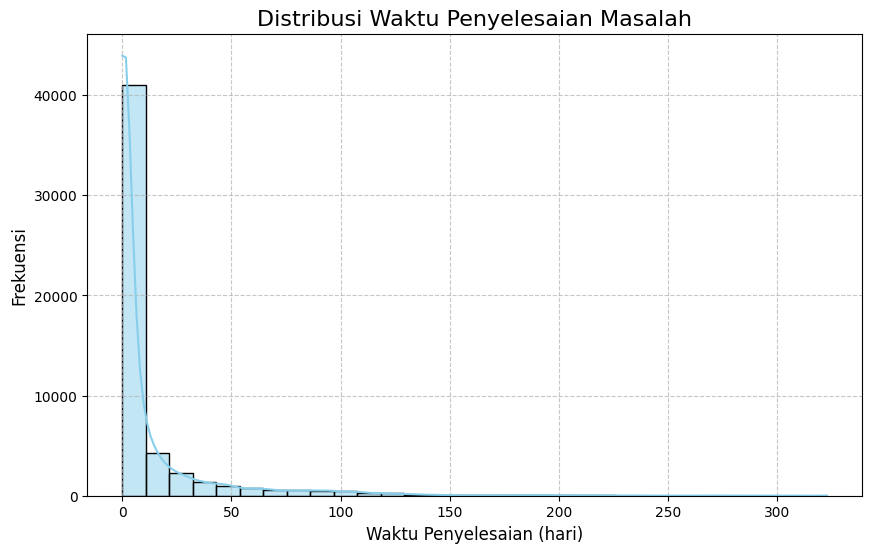

In [131]:
plt.figure(figsize=(10, 6))

sns.histplot(df['WAKTU_PENYELESAIAN'], bins=30, kde=True, color='skyblue')

plt.title('Distribusi Waktu Penyelesaian Masalah', fontsize=16)
plt.xlabel('Waktu Penyelesaian (hari)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Setalah dilakukan proses binning (pembuatan kategori), maka diperoleh histogram sebagai berikut.

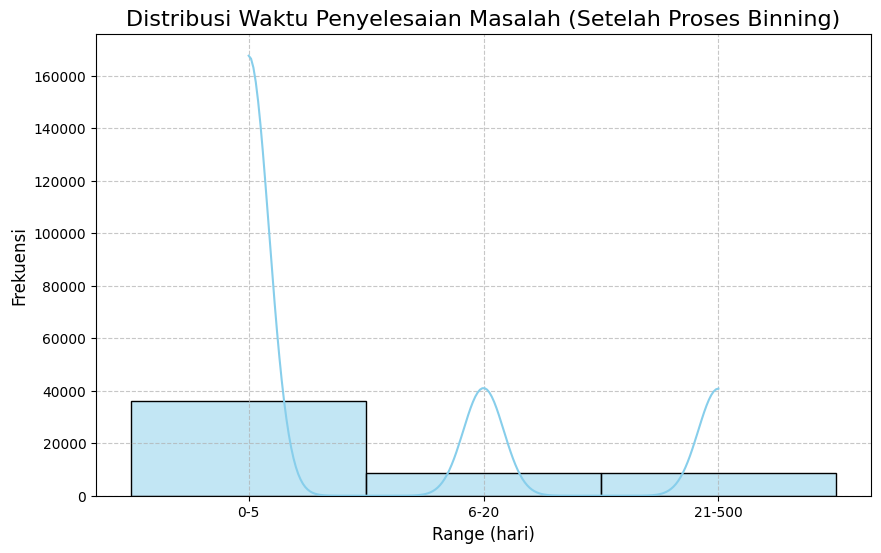

In [132]:
plt.figure(figsize=(10, 6))

sns.histplot(df1, bins=30, kde=True, color='skyblue')

plt.title('Distribusi Waktu Penyelesaian Masalah (Setelah Proses Binning)', fontsize=16)
plt.xlabel('Range (hari)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Berdasarkan dua histogram di atas, distribusi waktu penyelesaian masalah cenderung berada di range $0-5$ hari. Hal ini menjadi indikasi bahwa waktu penyelesaian masalah cenderung cepat dan tidak menunggu waktu selama lebih dari satu minggu. Hanya saja, ada beberapa kasus yang memang perlu waktu lebih dari satu minggu.

<ipython-input-133-e792b5b135cb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='FAKTOR_PROBLEM', data=df, palette='mako', order=order, legend=False)


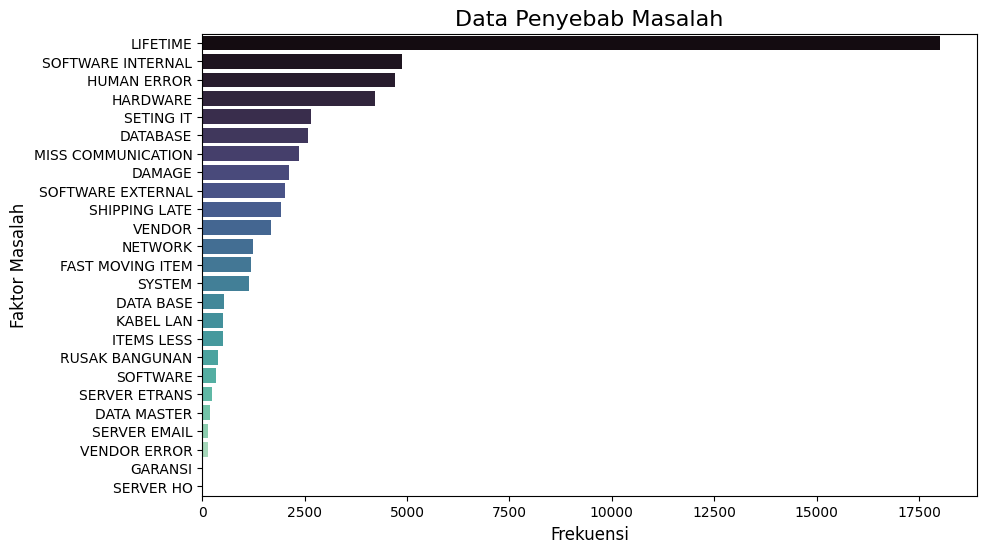

In [133]:
plt.figure(figsize=(10, 6))

order = df['FAKTOR_PROBLEM'].value_counts().index
sns.countplot(y='FAKTOR_PROBLEM', data=df, palette='mako', order=order, legend=False)

plt.title('Data Penyebab Masalah', fontsize=16)
plt.xlabel('Frekuensi', fontsize=12)
plt.ylabel('Faktor Masalah', fontsize=12)

plt.show()

Kemudian, dibentuk diagram batang untuk melihat persebaran jumlah faktor masalah. Dapat dilihat bahwa penyebab masalah tertinggi berupa faktor LIFETIME yang berkisar di angka >17500 kasus, sedangkan penyebab masalah terendah berupa faktor SERVER HO.

### Analisis tingkat kepuasan dan pengaruh faktor masalah terhadap tingkat kepuasan



*   Bagaimana persentase atau perbandingan tingkat kepuasan pelanggan?
*   Bagaimana distribusi faktor masalah terhadap tingkat kepuasan pelanggan?




Diberikan diagram lingkaran untuk mengilustrasikan perbandingan tingkat kepuasan pelanggan.

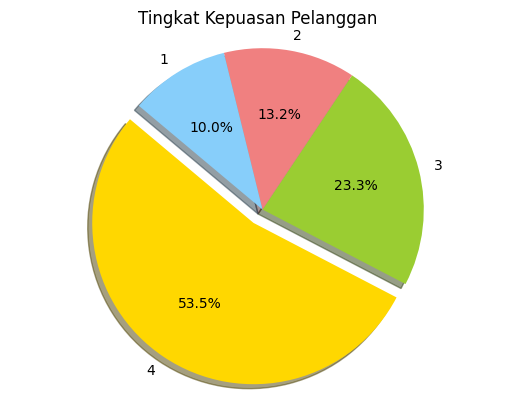

In [134]:
labels = [4,3,2,1]
sizes = df['TINGKAT_KEPUASAN'].value_counts()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')

plt.title('Tingkat Kepuasan Pelanggan')
plt.show()

Dari data yang diberikan, sebanyak $53.5\%$ pelanggan memberikan tingkat kepuasan $4$. Kemudian, $23.3\%$ pelanggan memberikan tingkat kepuasan $3$, $13.2\%$ pelanggan memberikan tingkat kepuasan $2$, dan yang paling rendah, $10.0\%$ pelanggan memberikan tingkat kepuassan $1$.



<ipython-input-135-f4e712a32192>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TINGKAT_KEPUASAN', y='FAKTOR_PROBLEM', data=df, palette='Set2', showmeans=True, meanline=True)


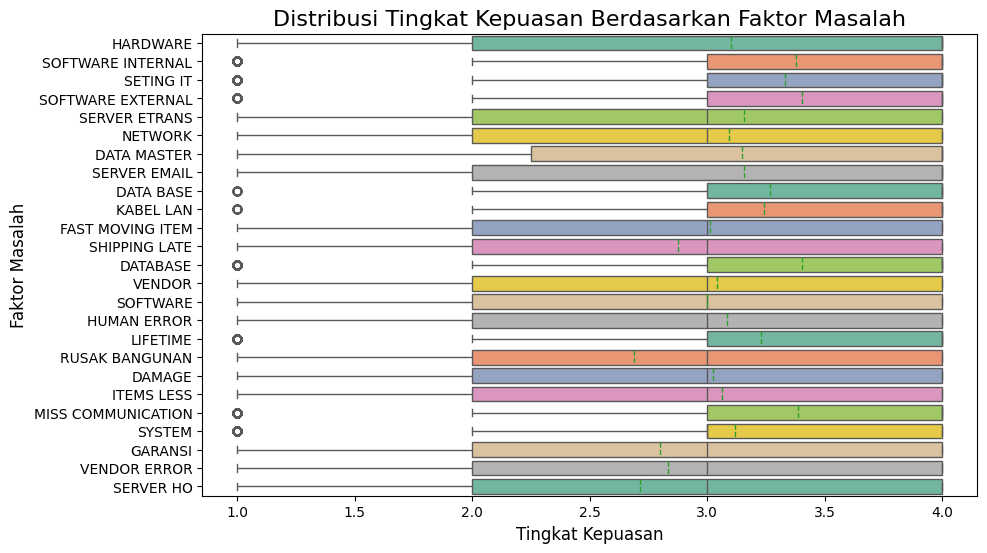

In [135]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='TINGKAT_KEPUASAN', y='FAKTOR_PROBLEM', data=df, palette='Set2', showmeans=True, meanline=True)

plt.title('Distribusi Tingkat Kepuasan Berdasarkan Faktor Masalah', fontsize=16)
plt.xlabel('Tingkat Kepuasan', fontsize=12)
plt.ylabel('Faktor Masalah', fontsize=12)
plt.show()

Selanjutnya, diperlihatkan box plot antara tingkat kepuasan pelanggan dengan faktor masalah. Berdasarkan data, distribusi antara tingkat kepuasan pelanggan dengan faktor masalah cenderung bervariasi. Jika dilihat berdasarkan rerata (mean), beberapa faktor masalah memiliki tingkat kepuasan yang rendah, seperti SERVER HO dan RUSAK BANGUNAN.

### Hubungan antara waktu penyelesaian masalah dengan tingkat kepuasan pelanggan

*   Bagaimana korelasi/hubungan antara waktu penyelesaian masalah dengan tingkat kepuasan pelanggan?


Terkait dengan data yang bersifat numerik, hubungan waktu penyelesaian masalah dengan tingkat kepuasan pelanggan dapat dilihat melalui perhitungan korelasi antara dua feature tersebut. Untuk melihat korelasi antara keduanya, maka diperlihatkan plot heatmap sebagai berikut.

<Axes: >

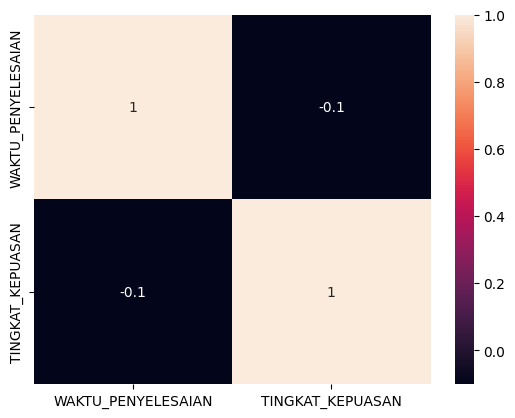

In [136]:
correlation = df[['WAKTU_PENYELESAIAN', 'TINGKAT_KEPUASAN']].corr()
sns.heatmap(correlation, annot=True)

Nilai korelasi antara waktu penyelesaian masalah dengan tingkat kepuasan pelanggan sebesar $-0.1$. Artinya, penyelesaian masalah sangat kontras (berbanding terbalik) dengan tingkat kepuasan pelanggan. Atau dengan kata lain, semakin besar waktu penyelesaian masalah (semakin lambat), semakin rendah pula tingkat kepuasan pelanggan.

### Perbandingan rata-rata tingkat kepuasan berdasarkan wilayah dan divisi

*   Wilayah/cabang manakah yang memiliki rata-rata tingkat kepuasan tertinggi/terendah?
*   Divisi manakah yang memiliki rata-rata tingkat kepuasan tertinggi/terendah?

Diberikan diagram batang untuk melihat rata-rata tingkat kepuasan berdasarkan wilayah dan divisi sebagai berikut.

<ipython-input-137-42a19af17b0d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='NAMA_CABANG', x='TINGKAT_KEPUASAN', data=mean_st, estimator='mean', palette='coolwarm')


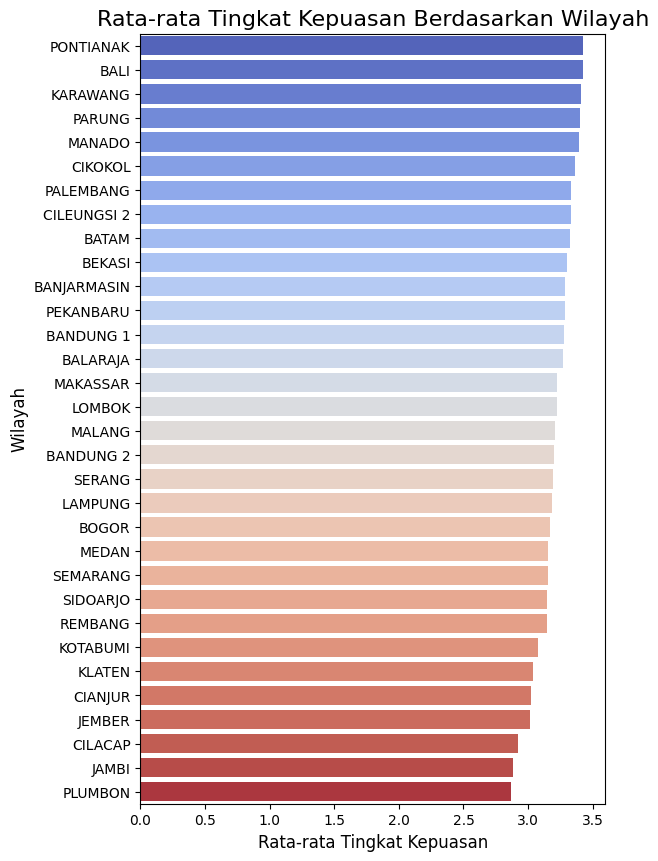

In [137]:
plt.figure(figsize=(6, 10))
mean_st = df.groupby('NAMA_CABANG')['TINGKAT_KEPUASAN'].mean().reset_index()
mean_st = mean_st.sort_values(by='TINGKAT_KEPUASAN', ascending=False)
sns.barplot(y='NAMA_CABANG', x='TINGKAT_KEPUASAN', data=mean_st, estimator='mean', palette='coolwarm')

plt.title('Rata-rata Tingkat Kepuasan Berdasarkan Wilayah', fontsize=16)
plt.ylabel('Wilayah', fontsize=12)
plt.xlabel('Rata-rata Tingkat Kepuasan', fontsize=12)
plt.show()

<ipython-input-138-9d1ec90e7a93>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='DIVISI', x='TINGKAT_KEPUASAN', data=mean_st, estimator='mean', palette='coolwarm')


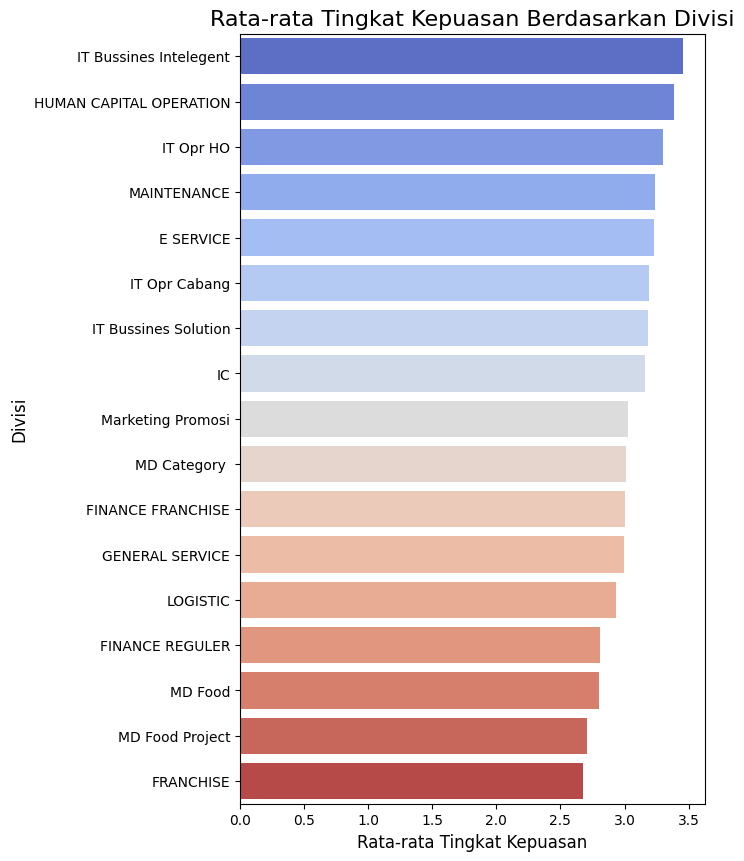

In [138]:
plt.figure(figsize=(6, 10))
mean_st = df.groupby('DIVISI')['TINGKAT_KEPUASAN'].mean().reset_index()
mean_st = mean_st.sort_values(by='TINGKAT_KEPUASAN', ascending=False)
sns.barplot(y='DIVISI', x='TINGKAT_KEPUASAN', data=mean_st, estimator='mean', palette='coolwarm')

plt.title('Rata-rata Tingkat Kepuasan Berdasarkan Divisi', fontsize=16)
plt.ylabel('Divisi', fontsize=12)
plt.xlabel('Rata-rata Tingkat Kepuasan', fontsize=12)
plt.show()

Berdasarkan diagram yang diberikan, wilayah/cabang yang memiliki rata-rata tingkat kepuasan tertinggi adalah PONTIANAK, sedangkan wilayah/cabang yang memiliki rata-rata tingkat kepuasan terendah adalah PLUMBON.

Selanjutnya, divisi yang memiliki rata-rata tingkat kepuasan tertinggi adalah IT Bussines Intelegent, sedangkan divisi yang memiliki rata-rata tingkat kepuasan terendah adalah FRANCHISE.

## Konklusi

Dari beberapa feature yang dibahas, semua feature berperan penting dalam pengembangan dan perbaikan kualitas pelayanan toko kedepannya. Beberapa feature seperti tingkat kepuasan pelanggan, faktor masalah, wilayah/cabang, divisi, dan waktu penyelesaian masalah, memiliki pengaruh dalam kualitas pelayanan.  



1.   Persebaran toko pada setiap wilayah dan distribusi faktor masalah pada setiap divisi
* Berdasarkan visualisasi, persebaran toko di berbagai wilayah cukup beragam. Data wilayah/cabang yang memiliki toko paling banyak/paling sedikit dapat ditentukan melalui hasil visualisasi. Hal ini dapat menentukan kebijakan toko dalam mengembangkan kualitas pelayanan di suatu wilayah.
*Analisis distribusi faktor masalah berdasarkan divisi menunjukkan bahwa setiap divisi menghadapi masalah dengan intensitas yang berbeda. Terdapat satu divisi yang mendominasi distribusi masalah yaitu MAINTENANCE, sementara divisi lain menunjukkan distribusi masalah yang lebih merata. Divisi yang menangani lebih banyak masalah perlu ditinjau ulang untuk peningkatan efisiensi.
2.   Analisis waktu penyelesaian masalah serta identifikasi faktor penyebab masalah
* Untuk waktu penyelesaian masalah dari berbagai kategori tergolong cukup cepat. Hanya saja masih ada beberapa kategori masalah yang memerlukan waktu lebih lama untuk diselesaikan. Kemudian melalui visualisasi, frekuensi faktor masalah juga dapat diketahui. Faktor masalah yang paling banyak perlu diidentifikasi lebih lanjut sebagai prioritas untuk perbaikan.
3.   Analisis tingkat kepuasan dan pengaruh faktor masalah terhadap tingkat kepuasan pelanggan
* Proses analisis ini menghasilkan persentase tingkat kepuasan dan data persebaran tingkat kepuasan dengan faktor masalah. Dengan mengetahui persentase tingkat kepuasan dan keterkaitan antara faktor masalah, sebaiknya pihak divisi terkait perlu menetapkan prioritas untuk beberapa faktor masalah yang secara signifikan menurunkan tingkat kepuasan pelanggan.
4.   Hubungan antara waktu penyelesaian masalah dengan tingkat kepuasan pelanggan
* Terdapat hubungan negatif antara waktu penyelesaian masalah dan tingkat kepuasan pelanggan. Semakin lama waktu yang dibutuhkan untuk menyelesaikan masalah, semakin rendah tingkat kepuasan pelanggan. Ini menegaskan pentingnya respon cepat dalam menangani masalah pelanggan untuk menjaga tingkat kepuasan yang tinggi. Divisi yang memiliki waktu penyelesaian yang lama harus dievaluasi ulang untuk memperbaiki alur kerja dan meningkatkan kecepatan penanganan.
5.   Perbandingan rata-rata tingkat kepuasan berdasarkan wilayah dan divisi
* Berdasarkan hasil visualisasi, perbedaan rata-rata tingkat kepuasan berdasarkan wilayah cukup terlihat tetapi tidak terlalu drastis. Hal ini bisa disebabkan oleh berbagai faktor, seperti efisiensi penyelesaian masalah di wilayah tersebut atau kompleksitas masalah yang lebih rendah. Kemudian rata-rata tingkat kepuasan juga berbeda-beda antar divisi. Divisi yang memiliki rata-rata tingkat kepuasan yang lebih rendah perlu melakukan evaluasi lebih lanjut terhadap kinerja divisi tersebut, serta perlu adanya dukungan tambahan atau pelatihan untuk meningkatkan efisiensi dan kepuasan pelanggan.

In [139]:
df.to_csv("dataset_final.csv")